# Set up a WQ-MAKER run using the Jupyter Notebook

## Step 1. Get oriented. 

You will find staged example data in "/opt/WQ-MAKER_example_data/" within the MASTER instance. List its contents with the `ls` command:

In [1]:
!ls -alh /opt/WQ-MAKER_example_data/

total 116K
drwxr-xr-x  4 root root 4.0K Oct 20 17:50 .
drwxr-xr-x 19 root root 4.0K Oct 25 18:02 ..
-rw-r--r--  1 root root   37 Oct 20 13:43 .ansible.cfg
drwxr-xr-x  8 root root 4.0K Oct 20 17:50 .git
-rwxr-xr-x  1 root root 1.4K Sep 11 15:31 maker_bopts.ctl
-rwxr-xr-x  1 root root 1.4K Sep 11 15:31 maker_exe.ctl
-rwxr-xr-x  1 root root   10 Oct 20 13:44 maker-hosts
-rwxr-xr-x  1 root root 4.5K Oct 20 13:11 maker_opts.ctl
drwxr-xr-x  2 root root 4.0K Sep 20 15:13 test_data
-rwxr-xr-x  1 root root  708 Oct 20 13:55 worker-launch.yml
-rw-r--r--  1 root root  48K Oct 20 17:50 WQ-MAKER-Jupyter-notebook-demo.ipynb
-rw-r--r--  1 root root  23K Oct 20 16:21 WQ-MAKER-Jupyter-notebook.ipynb


In [2]:
!ls /opt/WQ-MAKER_example_data/test_data

mRNA.fasta		  Os-rRNA.fa	       test_genome_chr1.fasta
msu-irgsp-proteins.fasta  plant_repeats.fasta  test_genome.fasta


* maker_*.ctl file are a set of configuration files that can be used for this exercise or generated as described below.
* .ansible.cfg, worker-launch.yml and maker-hosts are ansible-playbook and host file for luanching jobs on WORKERS (optional for WQ-MAKER)
* fasta files include a scaled-down genome (test_genome.fasta) which is comprised of the first 300kb of 12 chromosomes of rice and scaled-down genome (test_genome_chr1.fasta) which is comprised of the first 300kb of first chromosome of rice
* mRNA sequences from NCBI (mRNA.fasta)
* publicly available annotated protein sequences of rice (MSU7.0 and IRGSP1.0) - msu-irgsp-proteins.fasta collection of plant repeats (plant_repeats.fasta)
* ribosomal RNAsequence of rice (Os-rRNA.fa)
* WQ-MAKER-Jupyter-notebooks for running WQ-MAKER in Jupyter-notebooks

Executables for running MAKER are located in /opt/maker/bin and /opt/maker/exe:

In [3]:
!ls /opt/maker/bin/

cegma2zff	   gff3_merge	   maker2wap		   map_fasta_ids
chado2gff3	   iprscan2gff3    maker2zff		   map_gff_ids
compare		   iprscan_wrap    maker_functional	   mpi_evaluator
cufflinks2gff3	   ipr_update_gff  maker_functional_fasta  mpi_iprscan
evaluator	   maker	   maker_functional_gff    tophat2gff3
fasta_merge	   maker2chado	   maker_map_ids
fasta_tool	   maker2eval_gtf  map2assembly
genemark_gtf2gff3  maker2jbrowse   map_data_ids


As the names suggest the **/opt/maker/bin** directory includes many useful auxiliary scripts.  For example cufflinks2gff3 will convert output from an RNA-seq analysis into a GFF3 file that can be used for input as evidence for WQ-MAKER. RepeatMasker, augustus, blast, exonerate, and snap are programs that MAKER uses in its pipeline.  We recommend reading [MAKER Tutorial](http://weatherby.genetics.utah.edu/MAKER/wiki/index.php/MAKER_Tutorial_for_GMOD_Online_Training_2014) at GMOD for more information about these.

### Step 2. Set up a WQ-MAKER run.  Create a working directory called "maker_run" on your home directory using the mkdir command and use cd to move into that directory:

Navigate to the mounted volume for creating test directory. **This command assumes that you have already created and attached the volume to your MASTER instance.**

In [4]:
%cd /vol_b

/vol_b


In [5]:
!mkdir wq_maker_run
%cd wq_maker_run

/vol_b/wq_maker_run


### Step 3. Copy the contents of  "WQ-MAKER_example_data" into the current directory using cp -r command.  Verify using the ls command.  Change the permissions on that directory

In [6]:
!sudo cp -r /opt/WQ-MAKER_example_data/test_data .
!sudo chown -hR $USER test_data
!sudo chgrp -hR $USER test_data

Run the maker help function

In [7]:
!maker -h

Argument "2.53_01" isn't numeric in numeric ge (>=) at /usr/local/lib/x86_64-linux-gnu/perl/5.22.1/forks.pm line 1570.

MAKER version 2.31.9

Usage:

     maker [options] <maker_opts> <maker_bopts> <maker_exe>


Description:

     MAKER is a program that produces gene annotations in GFF3 format using
     evidence such as EST alignments and protein homology. MAKER can be used to
     produce gene annotations for new genomes as well as update annotations
     from existing genome databases.

     The three input arguments are control files that specify how MAKER should
     behave. All options for MAKER should be set in the control files, but a
     few can also be set on the command line. Command line options provide a
     convenient machanism to override commonly altered control file values.
     MAKER will automatically search for the control files in the current
     working directory if they are not specified on the command line.

     Input files listed in the control options fil

### Step 5.  Create control files that tell MAKER what to do. Three files are required:

- maker_opts.ctl - gives location of input files (genome and evidence) and sets options that affect MAKER behavior
- maker_exe.ctl - gives path information for the underlying executables.
- maker_bopt.ctl - sets parameters for filtering BLAST and Exonerate alignment results

In [8]:
!maker -CTL
!ls

Argument "2.53_01" isn't numeric in numeric ge (>=) at /usr/local/lib/x86_64-linux-gnu/perl/5.22.1/forks.pm line 1570.
maker_bopts.ctl  maker_exe.ctl	maker_opts.ctl	test_data


- The "maker_exe.ctl" is automatically generated with the correct paths to executables and does not need to be modified.  
- The "maker_bopt.ctl" is automatically generated with reasonable default parameters and also does not need to be modified unless you want to experiment with optimization of these parameters.
- The automatically generated "maker_opts.ctl" file **needs to be modified** in order to specify the genome file and evidence files to be used as input.  You can use the text editor **"vi"** or **"nano"** that is already installed in the **MASTER** instance

Delete the current file and copy the staged version here and copy the pre-edited version of the "maker_opts.ctl" file that is staged in /opt/WQ-MAKER_example_data. 

In [9]:
!rm maker_opts.ctl
!cp /opt/WQ-MAKER_example_data/maker_opts.ctl .

### Step 6.  Run WQ-MAKER on MASTER

In [10]:
!ls

maker_bopts.ctl  maker_exe.ctl	maker_opts.ctl	test_data


In [11]:
import os
os.system("wq_maker -contigs-per-split 1 -cores 1 -memory 2048 -disk 4096 -N wq_test_${USER} -d all -o master.dbg -debug_size_limit=0 > log_file 2>&1 &")

0

* -contigs-per-split 1: splits the genome file into 1 contig/scaffold/sequence per file. By specifiying this option, we are telling wq_maker to split the genome file into 1 sequence per file. By default, the wq_maker splits the fasta file into 10 sequences per file and this case, it is not ideal because, there will be 2 files (1 containing chromosomes from 1-10 and the other containing 11-12). This will decrease the speed at the wq_maker annotates the genome. 

**Unless otherwise you have a complete genome containing chromosomes or very few scaffolds, it is not recommended to use this option. For example if you have a genome that contains 10,000 sequences, then this option will create 10,000 files on your working directory which is not ideal of navigation purposes. Check to see how many contigs/scaffolds/chromosomes you have in your genome using 
$$grep ">" -c <genome fasta file>$$
and if the number is too high, then avoid this option**

* -N maker_run_ud sets the project name to wq_test_{USER}. This is mandatory if we need to run WQ-MAKER. 
* -d all Sets the debug flag for Work Queue. For all debugging output, try 'all'
* -o master.dbg Sets the debug file for Work Queue
* -debug_size_limit=0 Sets the byte wrap around on the debug file. 0 signifies it is never wrapped (Default it 1M)
* -stats test_out_stats.txt Specifies the file were Work Queue master stats are written
* log_file.txt captures the stdout

Wait for 1-2 minutes for the MASTER to advertise master status to the catalog server before your run WQ-MAKER on the WORKERS. 

In [12]:
!tail log_file

Wed Oct 25 18:41:24 2017 :: Submitting file ./test_data/test_genome.fasta_000003 for processing.
Wed Oct 25 18:41:24 2017 :: Submitted task 9 for annotating ./test_data/test_genome.fasta_000003 with command:  maker -g ./test_data/test_genome.fasta_000003 -base test_genome -debug_size_limit=0
Wed Oct 25 18:41:24 2017 :: Submitting file ./test_data/test_genome.fasta_000005 for processing.
Wed Oct 25 18:41:24 2017 :: Submitted task 10 for annotating ./test_data/test_genome.fasta_000005 with command:  maker -g ./test_data/test_genome.fasta_000005 -base test_genome -debug_size_limit=0
Wed Oct 25 18:41:24 2017 :: Submitting file ./test_data/test_genome.fasta_000001 for processing.
Wed Oct 25 18:41:24 2017 :: Submitted task 11 for annotating ./test_data/test_genome.fasta_000001 with command:  maker -g ./test_data/test_genome.fasta_000001 -base test_genome -debug_size_limit=0
Wed Oct 25 18:41:24 2017 :: Submitting file ./test_data/test_genome.fasta_000007 for processing.
Wed Oct 25 18:41:24 20

### Step 7.  Run WQ-MAKER on WORKERS

For running WQ-MAKER on WORKERS you need three files. 
* Ansible config file
* Maker hostes file
* Ansible playbook

\1. Copy *ansible.cfg* file into your home directory which will help you to avoid host verification

In [13]:
!cp /opt/WQ-MAKER_example_data/.ansible.cfg ~

In [14]:
!cat ~/.ansible.cfg

[defaults]
host_key_checking = False


\2. Copy `maker-hosts` file into your working directory and populate it with ip addresses of the workers

In [15]:
!cp /opt/WQ-MAKER_example_data/maker-hosts .
!echo "129.114.17.181" >> maker-hosts # This ip address is specific to my account. This will not work for you
!echo "149.165.169.203" >> maker-hosts # This ip address is specific to my account. This will not work for you

In [16]:
!cat maker-hosts

[workers]
129.114.17.181
149.165.169.203


\3.Copy the Ansible playbook to your working directory

In [17]:
!cp /opt/WQ-MAKER_example_data/worker-launch.yml .

In [18]:
!cat worker-launch.yml

---
- hosts : workers
  environment:
    PATH: "{{ ansible_env.PATH }}:/home/${USER}/bin:/home/${USER}/.local/bin:/opt/icommands:/opt/icommands:/opt/exonerate-2.2.0-x86_64/bin/:/opt/cctools/bin:/opt/ncbi-blast-2.6.0+/bin/:/opt/snoscan-0.9.1/:/opt/tRNAscan-SE-1.3.1/:/opt/snap/:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/opt/augustus-3.2.2/bin:/opt/maker/bin:/opt/RepeatMasker:/opt/snap"
    PERL5LIB: "/opt/tRNAscan-SE-1.3.1::/opt/cctools/lib/perl5/site_perl"
  tasks :
  - name : Execute the script
    shell : /opt/cctools/bin/work_queue_worker -N wq_test_${USER} -s /home/${USER} --cores all --debug-rotate-max=0 -d all -o /home/${USER}/worker.dbg


* -hosts is the name of the hosts (workers in this case. It can be anything)
tasks is the task that need to be performed by the Ansible (In this case run work_queue_worker)
name is just name of the task (It can be anything) 
* -N maker_run_test sets the project name to maker_run_test. This is mandatory if we need to run WQ-MAKER
* -s /home/upendra/ Set the location for creating the working directory of the worker
* --debug-rotate-max=0 Set the maximum size of the debug log (default 10M, 0 disables)
* -d all Sets the debug flag for Work Queue. For all debugging output, try 'all'
* -o worker.dbg Sets the debug file for Work Queue

Run WQ-MAKER on the WORKERS now

In [19]:
os.system("ansible-playbook -u ${USER} -i maker-hosts worker-launch.yml > log_file_2.txt 2>&1 &")

0

To check the status of the WQ-MAKER job, run the following. 

In [20]:
!work_queue_status -M wq_test_${USER}

PROJECT            HOST                   PORT WAITING RUNNING COMPLETE WORKERS 
wq_test_upendra    js-129-114-104-169.je  9155       0       6        6       2 


### Step 8. Stats output from MASTER instance 

In [21]:
!tail log_file

WQ-MAKER End_time:	1508975541000000
WQ-MAKER Elapsed:	0d 0:11:17.000000
Work Queue Wall Time:	0d 0:10:56.180315
Cumulative Task Wall Time:	0d 0:47:44.388733
Cumulative Task Good Execute Time:	0d 0:47:44.388733
Work Queue Send Time:	0d 0:00:33.681788
Work Queue Receive Time:	0d 0:00:09.224955
-----------------------------------------------------------------
Wed Oct 25 18:52:21 2017 :: MPI used :: Cores 1 :: Memory 2048 :: Disk 4096 
-----------------------------------------------------------------


The following are the output files from WQ-MAKER 

In [22]:
!ls test_genome.maker.output

maker_bopts.log  maker_opts.log  test_genome_datastore
maker_exe.log	 mpi_blastdb	 test_genome_master_datastore_index.log


* The maker_opts.log, maker_exe.log, and maker_bopts.log files are logs of the control files used for this run of MAKER.
* The mpi_blastdb directory contains FASTA indexes and BLAST database files created from the input EST, protein, and repeat databases.
* test_genome_master_datastore_index.log contains information on both the run status of individual contigs and information on where individual contig data is stored.
* The test_genome_datastore directory contains a set of subfolders, each containing the final MAKER output for individual contigs from the genomic fasta file.

Check the test_genome_master_datastore_index.log and task_outputs.txt to see if there were any failures:

In [23]:
!cat test_genome.maker.output/test_genome_master_datastore_index.log

Chr1	test_genome_datastore/41/30/Chr1/	STARTED
Chr10	test_genome_datastore/7C/72/Chr10/	STARTED
Chr11	test_genome_datastore/1E/AA/Chr11/	STARTED
Chr12	test_genome_datastore/1B/FA/Chr12/	STARTED
Chr2	test_genome_datastore/E9/36/Chr2/	STARTED
Chr3	test_genome_datastore/CC/EF/Chr3/	STARTED
Chr4	test_genome_datastore/A3/11/Chr4/	STARTED
Chr5	test_genome_datastore/8A/9B/Chr5/	STARTED
Chr6	test_genome_datastore/13/44/Chr6/	STARTED
Chr7	test_genome_datastore/91/B7/Chr7/	STARTED
Chr8	test_genome_datastore/9A/9E/Chr8/	STARTED
Chr9	test_genome_datastore/87/90/Chr9/	STARTED
Chr1	test_genome_datastore/41/30/Chr1/	FINISHED
Chr10	test_genome_datastore/7C/72/Chr10/	FINISHED
Chr11	test_genome_datastore/1E/AA/Chr11/	FINISHED
Chr12	test_genome_datastore/1B/FA/Chr12/	FINISHED
Chr2	test_genome_datastore/E9/36/Chr2/	FINISHED
Chr3	test_genome_datastore/CC/EF/Chr3/	FINISHED
Chr4	test_genome_datastore/A3/11/Chr4/	FINISHED
Chr5	test_genome_datastore/8A/9B/Chr5/	FINISHED
Chr6	test_genome_datastore/13/44/Chr6/	F

All completed.  Other possible status entries include:

*FAILED* - indicates a failed run on this contig, MAKER will retry these

*RETRY* - indicates that MAKER is retrying a contig that failed

*SKIPPED_SMALL* - indicates the contig was too short to annotate (minimum contig length is specified in maker_opt.ctl)

*DIED_SKIPPED_PERMANENT* - indicates a failed contig that MAKER will not attempt to retry (number of times to retry a contig is specified in maker_opt.ctl)

The actual output data is stored in in nested set of directories under* test_genome_datastore* in a nested directory structure.

A typical set of outputs for chromosome 6 looks like this:

In [24]:
!ls test_genome.maker.output/test_genome_datastore/*/*/Chr6

Chr6.gff		   Chr6.maker.snoscan.transcripts.fasta  run.log
Chr6.maker.proteins.fasta  Chr6.maker.transcripts.fasta		 theVoid.Chr6


* The Chr6.gff file is in GFF3 format and contains the maker gene models and underlying evidence such as repeat regions, alignment data, and ab initio gene predictions, as well as fasta sequence.  Having all of these data in one file is important to enable visualization of the called gene models and underlying evidence, especially using tools like Apollo which enable manual editing and curation of gene models.
* The fasta files Chr6.maker.proteins.fasta and Chr6.maker.transcripts.fasta contain the protein and transcript sequences for the final MAKER gene calls.
* The Chr6.maker.non_overlapping_ab_initio.proteins.fasta and Chr6.maker.non_overlapping_ab_initio.transcripts.fasta files are models that don't overlap MAKER genes that were rejected for lack of support.
* The Chr6.maker.snap_masked.proteins.fasta and Chr6.maker.snap_masked.transcript.fasta are the initial SNAP predicted models not further processed by MAKER

The output directory theVoid.Chr1 contains raw output data from all of the pipeline steps.  One useful file found here is the repeat-masked version of the contig, query.masked.fasta.

### Step 9: Merge the gff files

In [25]:
%cd test_genome.maker.output/
!gff3_merge -n -d test_genome_master_datastore_index.log

/vol_b/wq_maker_run/test_genome.maker.output


* -d The location of the MAKER datastore index log file.
* -n Do not print fasta sequence in footer

The final output from gff3_merge is **"test_genome.all.gff"**

In [26]:
!head test_genome.all.gff

##gff-version 3
Chr6	.	contig	1	100000	.	.	.	ID=Chr6;Name=Chr6
Chr6	maker	gene	33943	37124	.	+	.	ID=maker-Chr6-exonerate_protein2genome-gene-0.0;Name=maker-Chr6-exonerate_protein2genome-gene-0.0
Chr6	maker	mRNA	33943	37124	453	+	.	ID=maker-Chr6-exonerate_protein2genome-gene-0.0-mRNA-1;Parent=maker-Chr6-exonerate_protein2genome-gene-0.0;Name=maker-Chr6-exonerate_protein2genome-gene-0.0-mRNA-1;_AED=0.23;_eAED=0.23;_QI=0|0|0|1|0|0|5|0|150
Chr6	maker	exon	33943	33981	.	+	.	ID=maker-Chr6-exonerate_protein2genome-gene-0.0-mRNA-1:exon:0;Parent=maker-Chr6-exonerate_protein2genome-gene-0.0-mRNA-1
Chr6	maker	exon	34283	34350	.	+	.	ID=maker-Chr6-exonerate_protein2genome-gene-0.0-mRNA-1:exon:1;Parent=maker-Chr6-exonerate_protein2genome-gene-0.0-mRNA-1
Chr6	maker	exon	34749	34907	.	+	.	ID=maker-Chr6-exonerate_protein2genome-gene-0.0-mRNA-1:exon:2;Parent=maker-Chr6-exonerate_protein2genome-gene-0.0-mRNA-1
Chr6	maker	exon	35977	36055	.	+	.	ID=maker-Chr6-exonerate_protein2genome-gene-0.0-mRNA-1:exon:3

Extract only the maker annotations

In [27]:
!grep -P "\tmaker\t" test_genome.all.gff > test_genome.all.maker.gff

In [28]:
!ls

maker_bopts.log  test_genome.all.gff
maker_exe.log	 test_genome.all.maker.gff
maker_opts.log	 test_genome_datastore
mpi_blastdb	 test_genome_master_datastore_index.log


Check the number of genes

In [29]:
!grep -P "\tgene\t" test_genome.all.maker.gff | wc -l

241


### Step 10: Generate some stats from the WQ-MAKER run

In [1]:
import pandas as pd

Change the format of the maker_wq.stats file

In [32]:
!sed 's/# //' ../maker_wq.stats > temp && mv temp ../maker_wq.stats

In [62]:
input_file1 = "../maker_wq.stats"
df = pd.read_csv(input_file1, sep=" ")

In [64]:
df.head()

,timestamp,workers_connected,workers_init,workers_idle,workers_busy,workers_able,workers_joined,workers_removed,workers_released,workers_idled_out,...,total_disk,committed_cores,committed_memory,committed_disk,max_cores,max_memory,max_disk,min_cores,min_memory,min_disk
0,1509125954066170,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1509126038007221,1,0,0,1,1,1,0,0,0,...,43674,6,12288,24576,6,15947,43674,0,0,0
2,1509126208694320,1,0,0,1,1,1,0,0,0,...,43674,5,10240,20480,6,15947,43674,0,0,0
3,1509126214003740,1,0,0,1,1,1,0,0,0,...,43674,6,12288,24576,6,15947,43674,0,0,0
4,1509126215897363,1,0,0,1,1,1,0,0,0,...,43674,5,10240,20480,6,15947,43674,0,0,0


#### Let's generate some plots

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt

#### Plot between time and workers connected

Button(description=u'Export Figure', style=ButtonStyle())

Text(value=u'maker_wq.png', description=u'Export File:', placeholder=u'Type the filename you would like the figure exported to, i.e., "example.png"')

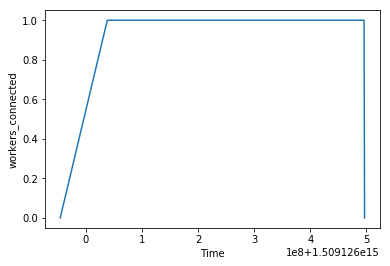

In [70]:
export_fig_file = os.path.splitext(input_file1)[0] + ".png"
button = widgets.Button(description='Export Figure')
text_box = widgets.Text(value=export_fig_file,
    placeholder='Type the filename you would like the figure exported to, i.e., "example.png"',
    description='Export File:',
    disabled=False
)
plt.plot(df[['timestamp']], df[['workers_connected']])
plt.xlabel('Time')
plt.ylabel('workers_connected')
current_fig = plt.gcf()
button.on_click(lambda _: current_fig.savefig(export_fig_file))

display(button)
display(text_box)

#### Plot between time and committed cores

Button(description=u'Export Figure', style=ButtonStyle())

Text(value=u'maker_wq.png', description=u'Export File:', placeholder=u'Type the filename you would like the figure exported to, i.e., "example.png"')

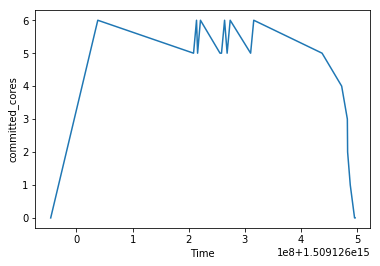

In [71]:
plt.plot(df[['timestamp']], df[['committed_cores']])
plt.xlabel('Time')
plt.ylabel('committed_cores')
current_fig = plt.gcf()
button.on_click(lambda _: current_fig.savefig(export_fig_file))

display(button)
display(text_box)

#### AED score plots

In [72]:
!grep "AED" test_genome.all.maker.gff | cut -f 9 | tr ';' '\n' | grep -e "ID" -e "_AED" | perl -0777 -pe 's/\n_AED=/\t/gxms' | sed 's/ID=//g' > test_genome.all.maker.AED.txt

In [73]:
input_file2 = "test_genome.all.maker.AED.txt"
df2 = pd.read_csv(input_file2, sep="\t", header=None)

In [74]:
df2.head()

,0,1
0,maker-Chr6-exonerate_protein2genome-gene-0.1-m...,0.23
1,maker-Chr6-exonerate_protein2genome-gene-0.10-...,0.13
2,maker-Chr6-exonerate_protein2genome-gene-0.5-m...,0.04
3,maker-Chr6-exonerate_protein2genome-gene-0.8-m...,0.01
4,maker-Chr6-exonerate_protein2genome-gene-0.4-m...,0.07


In [75]:
df2.columns
df2 = df2.rename(columns={0: 'gene', 1: 'AED'})

In [76]:
df2.head()

,gene,AED
0,maker-Chr6-exonerate_protein2genome-gene-0.1-m...,0.23
1,maker-Chr6-exonerate_protein2genome-gene-0.10-...,0.13
2,maker-Chr6-exonerate_protein2genome-gene-0.5-m...,0.04
3,maker-Chr6-exonerate_protein2genome-gene-0.8-m...,0.01
4,maker-Chr6-exonerate_protein2genome-gene-0.4-m...,0.07


In [77]:
export_fig_file = os.path.splitext(input_file2)[0] + ".png"
button = widgets.Button(description='Export Figure')
text_box = widgets.Text(value=export_fig_file,
    placeholder='Type the filename you would like the figure exported to, i.e., "example.png"',
    description='Export File:',
    disabled=False
)
    
def filter(aed=0.0):
    df_filtered = df2.query('AED<={}'.format(aed))
    plt.plot(df_filtered[['AED']])
    plt.xlabel('gene')
    plt.ylabel('AED')
    current_fig = plt.gcf()
    button.on_click(lambda _: current_fig.savefig(text_box.value))
        
# Min value = 0.0, Max value = 1.0, Slider increments by 0.1
interact(filter,i=FloatSlider(min=0, max=1.0, step=0.1, continuous_update=False));
display(text_box)
display(button)

interactive(children=(FloatSlider(value=0.0, description=u'aed', max=1.0), Output()), _dom_classes=('widget-interact',))

Text(value=u'test_genome.all.maker.AED.png', description=u'Export File:', placeholder=u'Type the filename you would like the figure exported to, i.e., "example.png"')

Button(description=u'Export Figure', style=ButtonStyle())

#### AED score plots after filtering

In [78]:
!quality_filter.pl -s test_genome.all.maker.gff > test_genome.all.maker.filtered.gff

In [79]:
!grep "AED" test_genome.all.maker.filtered.gff | cut -f 9 | tr ';' '\n' | grep -e "ID" -e "_AED" | perl -0777 -pe 's/\n_AED=/\t/gxms' | sed 's/ID=//g' > test_genome.all.maker.filtered.AED.txt

In [80]:
input_file3 = "test_genome.all.maker.filtered.AED.txt"
df3 = pd.read_csv(input_file3, sep="\t", header=None)

In [81]:
df3.head()

,0,1
0,maker-Chr6-exonerate_protein2genome-gene-0.1-m...,0.23
1,maker-Chr6-exonerate_protein2genome-gene-0.10-...,0.13
2,maker-Chr6-exonerate_protein2genome-gene-0.5-m...,0.04
3,maker-Chr6-exonerate_protein2genome-gene-0.8-m...,0.01
4,maker-Chr6-exonerate_protein2genome-gene-0.4-m...,0.07


In [82]:
df3 = df3.rename(columns={0: 'gene', 1: 'AED'})

In [83]:
df3.head()

,gene,AED
0,maker-Chr6-exonerate_protein2genome-gene-0.1-m...,0.23
1,maker-Chr6-exonerate_protein2genome-gene-0.10-...,0.13
2,maker-Chr6-exonerate_protein2genome-gene-0.5-m...,0.04
3,maker-Chr6-exonerate_protein2genome-gene-0.8-m...,0.01
4,maker-Chr6-exonerate_protein2genome-gene-0.4-m...,0.07


In [84]:
export_fig_file = os.path.splitext(input_file3)[0] + ".png"
button = widgets.Button(description='Export Figure')
text_box = widgets.Text(value=export_fig_file,
    placeholder='Type the filename you would like the figure exported to, i.e., "example.png"',
    description='Export File:',
    disabled=False
)
    
def filter(aed=0.0):
    df_filtered = df3.query('AED<={}'.format(aed))
    plt.plot(df_filtered[['AED']])
    plt.xlabel('gene')
    plt.ylabel('AED')
    current_fig = plt.gcf()
    button.on_click(lambda _: current_fig.savefig(text_box.value))
        
# Min value = 0.0, Max value = 1.0, Slider increments by 0.1
interact(filter,i=FloatSlider(min=0, max=1.0, step=0.1, continuous_update=False));
display(text_box)
display(button)

interactive(children=(FloatSlider(value=0.0, description=u'aed', max=1.0), Output()), _dom_classes=('widget-interact',))

Text(value=u'test_genome.all.maker.filtered.AED.png', description=u'Export File:', placeholder=u'Type the filename you would like the figure exported to, i.e., "example.png"')

Button(description=u'Export Figure', style=ButtonStyle())